In [1]:
import axelrod as axl

## Running Matches

In [2]:
axl.game.DefaultGame.RPST()

(3, 1, 0, 5)

In [3]:
players = (axl.Cooperator(), axl.Alternator())
match = axl.Match(players, 20)
match.play()
print(match.scores())
print(match.final_score())
print(match.final_score_per_turn())
print(match.winner())

[(3, 3), (0, 5), (3, 3), (0, 5), (3, 3), (0, 5), (3, 3), (0, 5), (3, 3), (0, 5), (3, 3), (0, 5), (3, 3), (0, 5), (3, 3), (0, 5), (3, 3), (0, 5), (3, 3), (0, 5)]
(30, 80)
(1.5, 4.0)
Alternator


In [4]:
match = axl.Match(players=players, turns=20, noise=0.1)
match.play()
print(match.scores())
print(match.final_score())
print(match.final_score_per_turn())
print(match.winner())

[(3, 3), (3, 3), (0, 5), (5, 0), (0, 5), (3, 3), (0, 5), (3, 3), (1, 1), (3, 3), (0, 5), (3, 3), (0, 5), (3, 3), (0, 5), (3, 3), (0, 5), (5, 0), (0, 5), (3, 3)]
(38, 68)
(1.9, 3.4)
Alternator


In [5]:
match.cooperation()

(17, 11)

## Running Tournaments

In [6]:
all_players = [axl.Cooperator(), axl.Defector(),axl.TitForTat(), axl.Grudger(), axl.Random(),axl.TidemanAndChieruzzi(), axl.Nydegger(), axl.Grofman(), axl.Shubik(), axl.SteinAndRapoport(), axl.Joss(), axl.Davis(), axl.Graaskamp(), axl.RevisedDowning(), axl.Feld(), axl.Tullock(),axl.SoftJoss(), axl.HardJoss(), axl.Tullock(), axl.Davis(), axl.Feld(), axl.AntiTitForTat(), axl.Geller(), axl.Graaskamp(), axl.Gambler(), axl.EvolvedANN(), axl.EvolvedFSM(), axl.EvolvedLookerUp(), axl.EvolvedHMM5(), axl.EvolvedLookerUp2_2_2(), axl.EvolvedLookerUp2_2_2(), axl.EvolvedANN5]

AttributeError: module 'axelrod' has no attribute 'TidemanAndChieruzzi'

In [7]:
tournament = axl.Tournament(players,noise=0.0,turns=100,repetitions=200)
results = tournament.play()
results.ranked_names

Analysing: 100%|██████████| 25/25 [00:00<00:00, 341.25it/s]


['Alternator', 'Cooperator']

/var/folders/yf/nhpg9fnj0577hsnsx3y4cd8h0000gn/T/ipykernel_96561/2188283945.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  p.show()


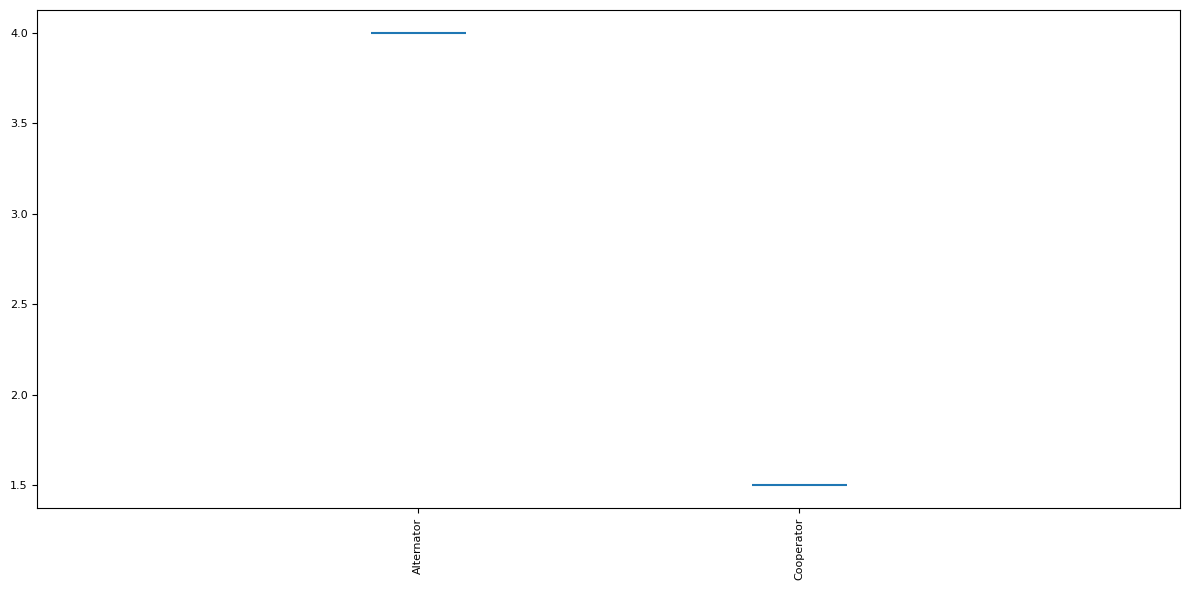

In [8]:
plot = axl.Plot(results)
p = plot.boxplot()
p.show()

/var/folders/yf/nhpg9fnj0577hsnsx3y4cd8h0000gn/T/ipykernel_96561/3325632004.py:2: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  p.show()


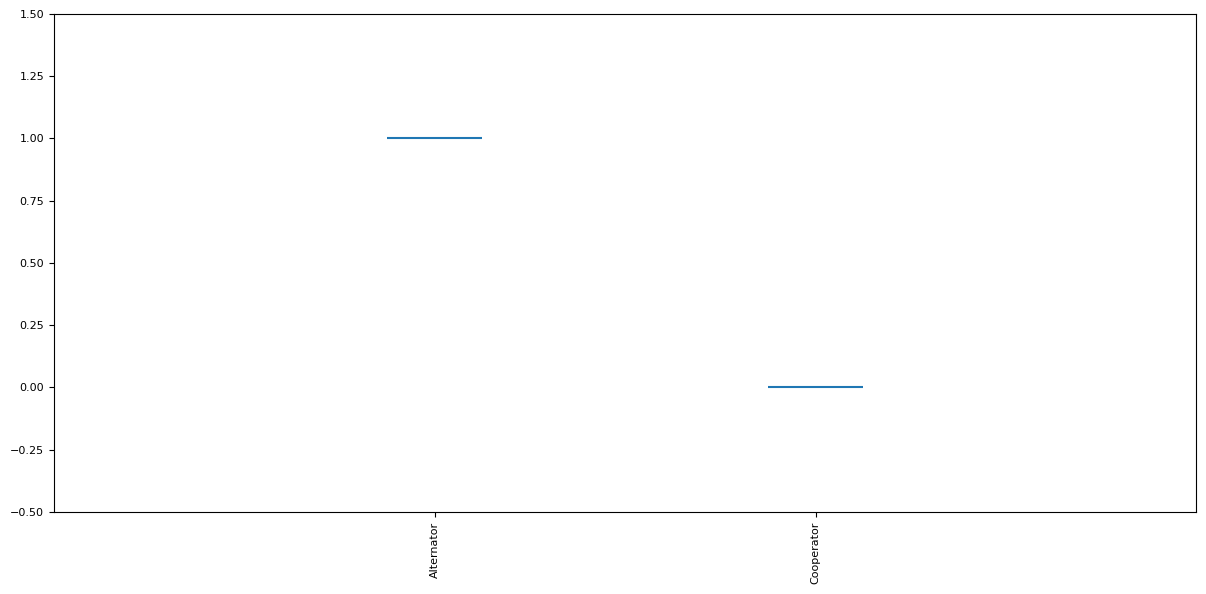

In [9]:
p = plot.winplot()
p.show()

/var/folders/yf/nhpg9fnj0577hsnsx3y4cd8h0000gn/T/ipykernel_96561/2277490039.py:2: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  p.show()


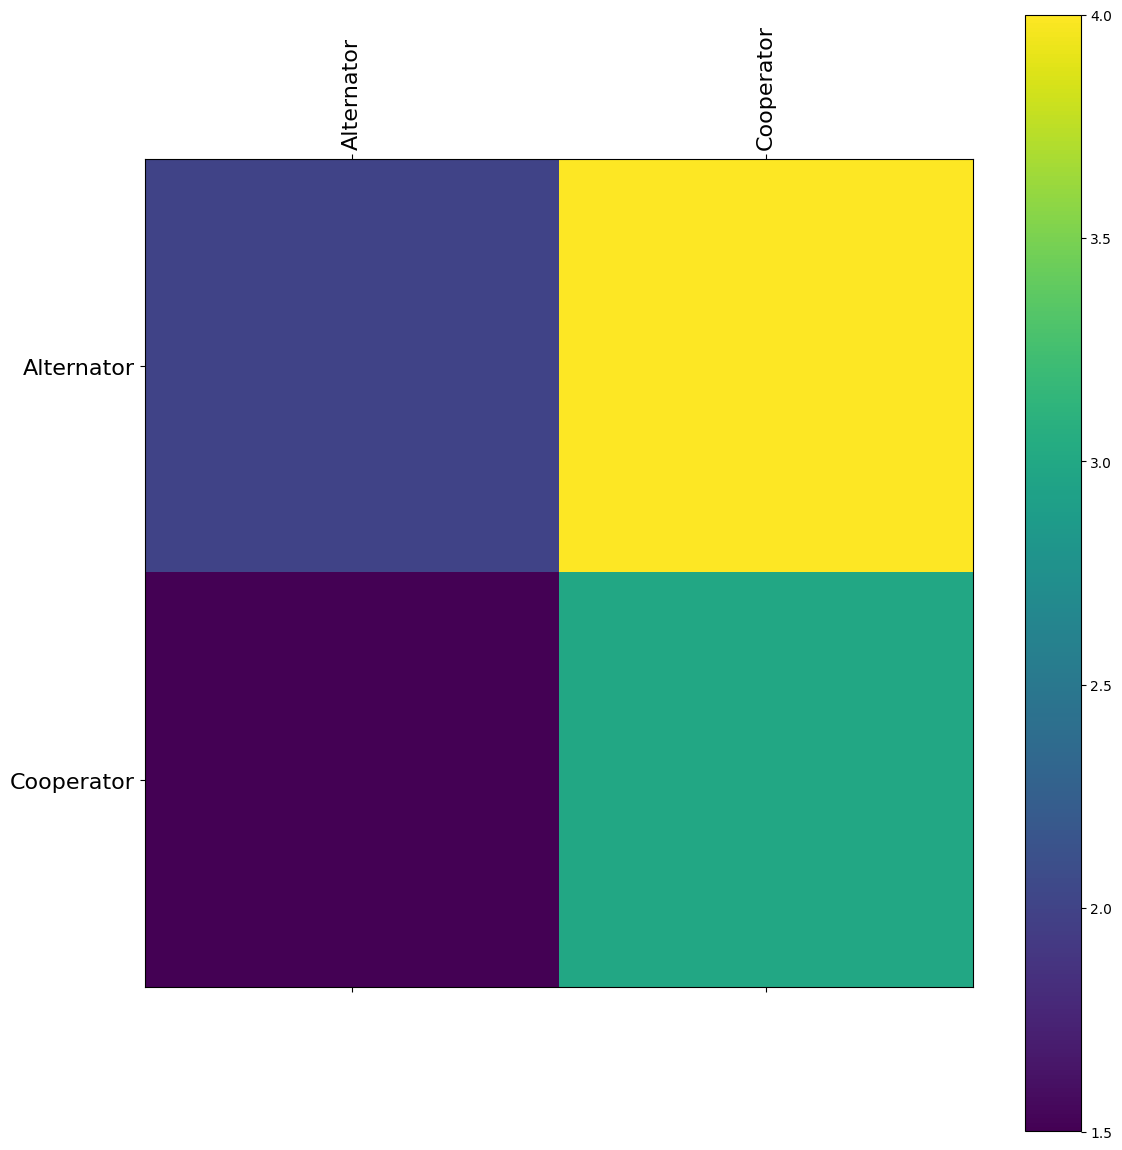

In [10]:
p = plot.payoff()
p.show()

# Running Axelrod's First Tournament

In [29]:
first_tournament_participants_ordered_by_reported_rank = [s() for s in axl.axelrod_first_strategies]
number_of_strategies = len(first_tournament_participants_ordered_by_reported_rank)
for player in first_tournament_participants_ordered_by_reported_rank:
    print(player)

Tit For Tat
First by Tideman and Chieruzzi: (D, D)
First by Nydegger
First by Grofman
First by Shubik
First by Stein and Rapoport: 0.05: (D, D)
Grudger
First by Davis: 10
First by Graaskamp: 0.05
First by Downing
First by Feld: 1.0, 0.5, 200
First by Joss: 0.9
First by Tullock
First by Anonymous
Random: 0.5


In [30]:
tournament = axl.Tournament(
    players=first_tournament_participants_ordered_by_reported_rank,
    turns=200,
    repetitions=5
)
results = tournament.play()

Analysing: 100%|██████████| 25/25 [00:00<00:00, 295.16it/s]


In [31]:
for name in results.ranked_names:
    print(name)

First by Stein and Rapoport: 0.05: (D, D)
First by Grofman
Tit For Tat
First by Shubik
First by Tideman and Chieruzzi: (D, D)
First by Nydegger
Grudger
First by Davis: 10
First by Graaskamp: 0.05
First by Downing
First by Feld: 1.0, 0.5, 200
First by Tullock
First by Joss: 0.9
Random: 0.5
First by Anonymous


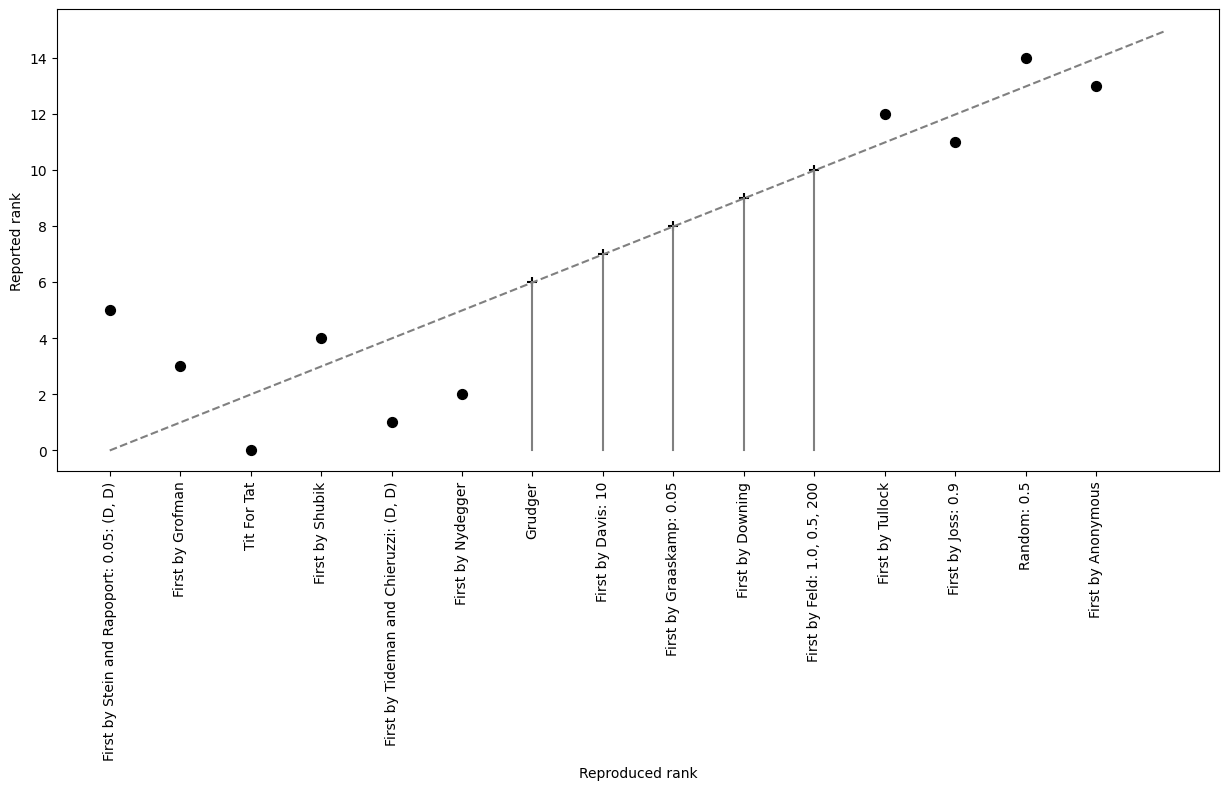

In [32]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 6)) 
plt.plot((0, 15), (0, 15), color="grey", linestyle="--")  
for original_rank, strategy in enumerate(first_tournament_participants_ordered_by_reported_rank):
    rank = results.ranked_names.index(str(strategy))
    if rank == original_rank:
        symbol = "+"
        plt.plot((rank, rank), (rank, 0), color="grey")
    else:
        symbol = "o"
    plt.scatter([rank], [original_rank], marker=symbol, color="black", s=50)  
plt.xticks(
    range(number_of_strategies),
    results.ranked_names,
    rotation=90
)  
plt.ylabel("Reported rank")  
plt.xlabel("Reproduced rank");  
plt.show()

/var/folders/yf/nhpg9fnj0577hsnsx3y4cd8h0000gn/T/ipykernel_96561/2188283945.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  p.show()


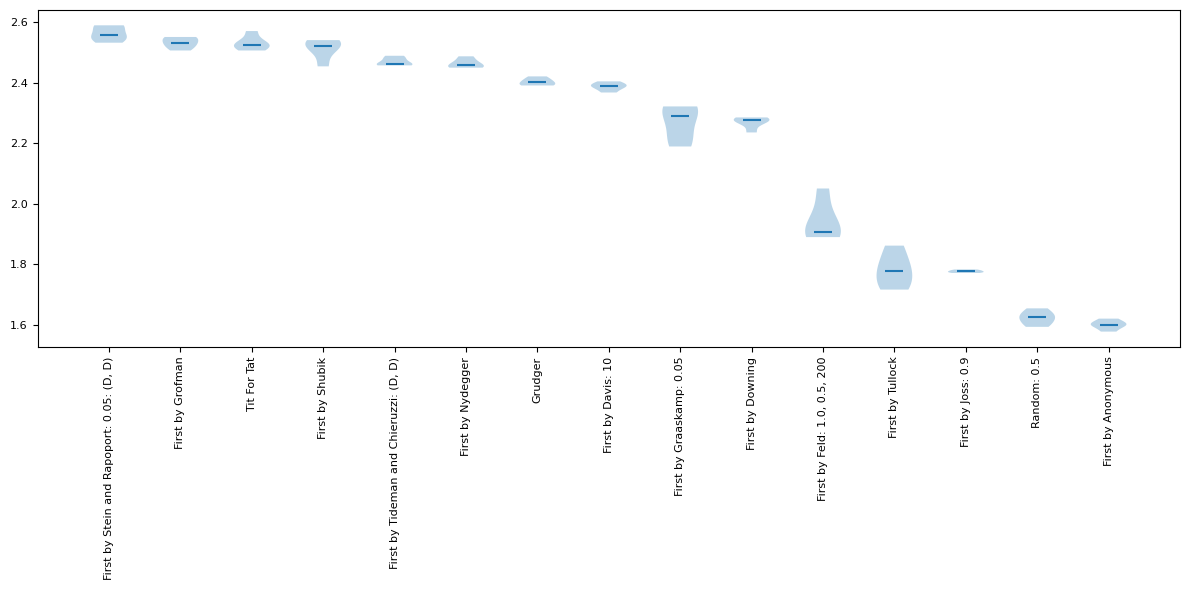

In [35]:
plot = axl.Plot(results)
p = plot.boxplot()
p.show()

/var/folders/yf/nhpg9fnj0577hsnsx3y4cd8h0000gn/T/ipykernel_96561/3325632004.py:2: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  p.show()


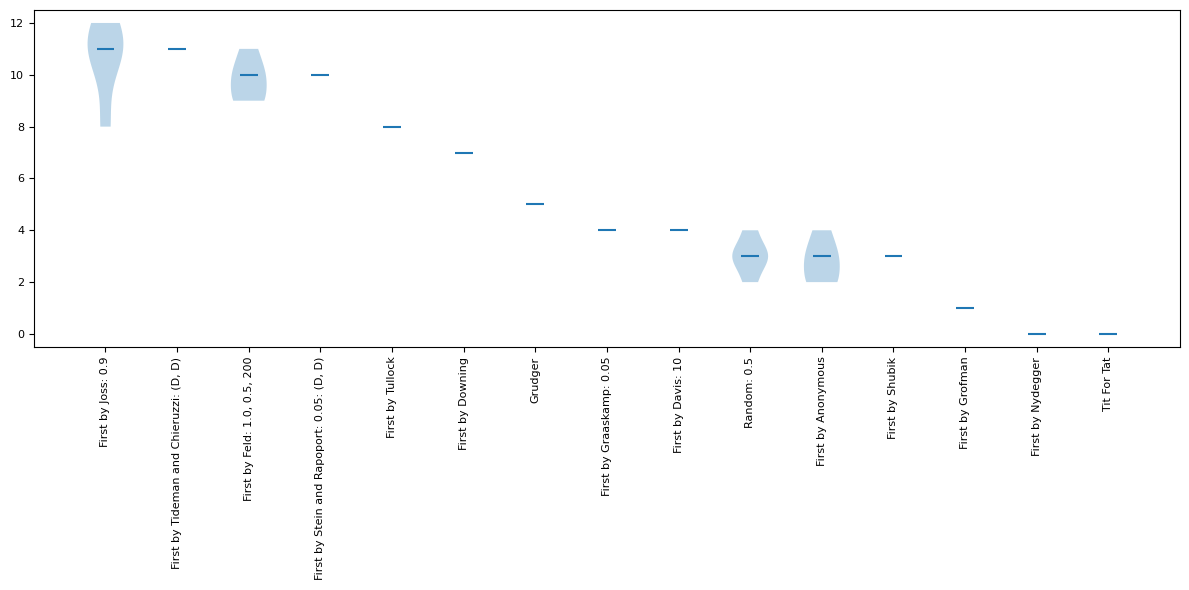

In [36]:
p = plot.winplot()
p.show()

/var/folders/yf/nhpg9fnj0577hsnsx3y4cd8h0000gn/T/ipykernel_96561/2277490039.py:2: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  p.show()


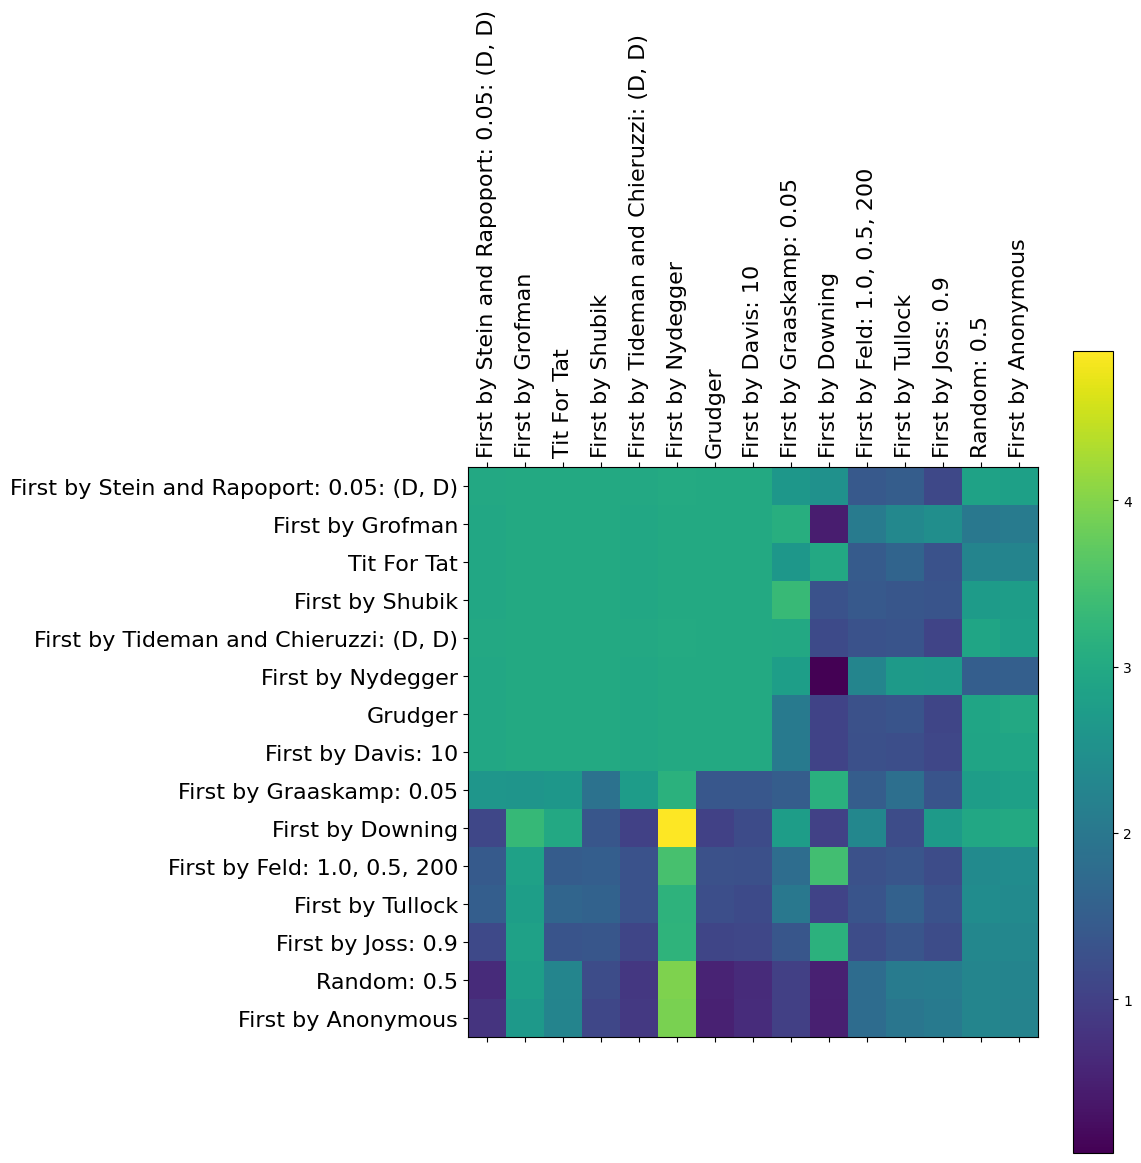

In [37]:
p = plot.payoff()
p.show()

# Moran Process

In [21]:
from axelrod.graph import Graph

In [23]:
#axl.seed(40)
edges = [(0, 1), (1, 2), (2, 3), (3, 1)]
graph = Graph(edges)
players = [axl.Cooperator(), axl.Cooperator(), axl.Cooperator(), axl.Defector()]
mp = axl.MoranProcess(players, interaction_graph=graph)
results = mp.play()
mp.population_distribution()

Counter({'Defector': 4})

# Probabilistic ending 

In [24]:
import axelrod as axl
players = [axl.Cooperator(), axl.Defector(),
           axl.TitForTat(), axl.Grudger()]
tournament = axl.Tournament(players, prob_end=0.5)

In [25]:
results = tournament.play()
m = results.payoff_matrix
for row in m:  
    print([round(ele, 1) for ele in row]) # Rounding output 

Analysing: 100%|██████████| 25/25 [00:00<00:00, 524.32it/s]

[3.0, 0.0, 3.0, 3.0]
[5.0, 1.0, 4.3, 3.8]
[3.0, 0.2, 3.0, 3.0]
[3.0, 0.3, 3.0, 3.0]


In [26]:
results.ranked_names 

['Defector', 'Grudger', 'Cooperator', 'Tit For Tat']

/var/folders/yf/nhpg9fnj0577hsnsx3y4cd8h0000gn/T/ipykernel_96561/2188283945.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  p.show()


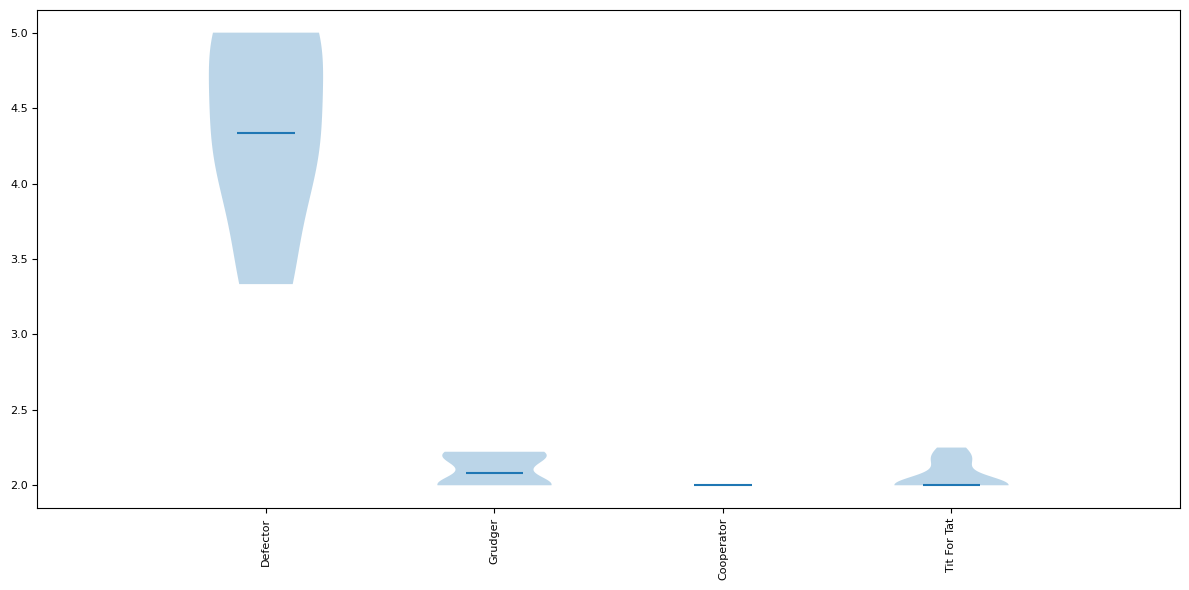

In [27]:
plot = axl.Plot(results)
p = plot.boxplot()
p.show()

/var/folders/yf/nhpg9fnj0577hsnsx3y4cd8h0000gn/T/ipykernel_96561/1451135483.py:2: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  p.show()


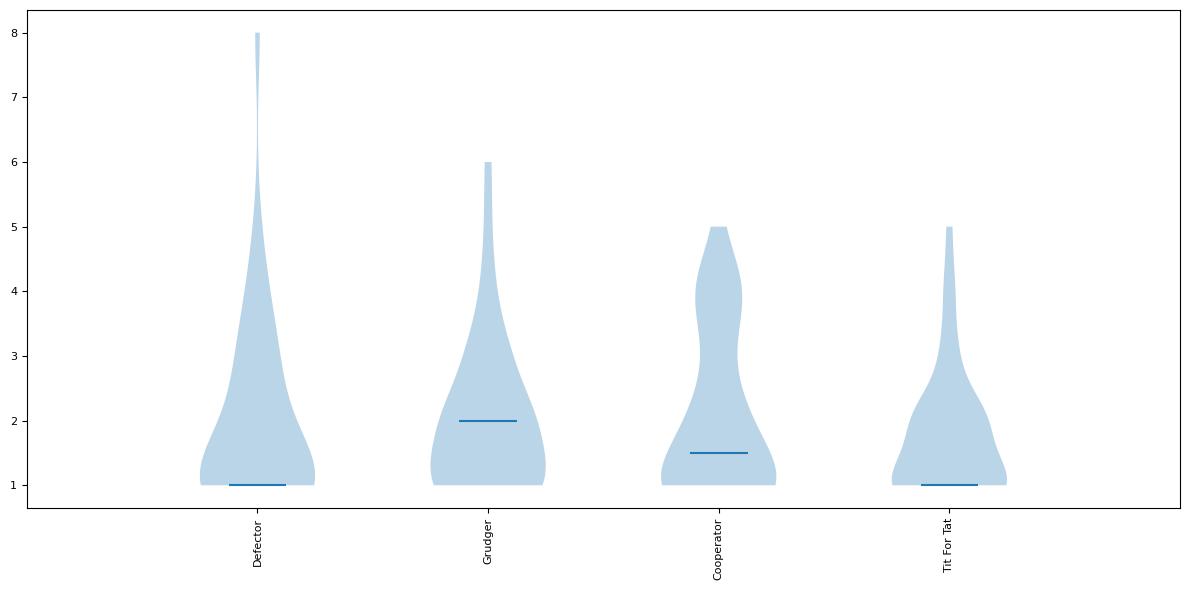

In [28]:
p = plot.lengthplot()
p.show()